In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from dataset import TileDataset
from models import TileMLP

In [2]:
batch_size = 256
dataset = TileDataset(batch_size)

2023-09-17 19:42:07.752079: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-17 19:42:07.775224: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-17 19:42:07.775406: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

permutating 10948088 training samples
creating tf.data.Dataset


2023-09-17 19:42:53.555015: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1051016448 exceeds 10% of free system memory.
loading valid: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 676/676 [00:02<00:00, 327.09it/s]


creating tf.data.Dataset


loading test: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 844/844 [00:01<00:00, 497.98it/s]


creating tf.data.Dataset


In [3]:
mlp = TileMLP(batch_size, learning_rate=5e-3)

In [4]:
mlp.train(dataset.train_data, dataset.valid_data)

2023-09-17 19:43:43.181289: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1051016448 exceeds 10% of free system memory.
2023-09-17 19:43:45.447196: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-17 19:43:45.469243: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fd5c69936f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-17 19:43:45.469260: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-09-17 19:43:45.505529: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-17 19:43:45.700511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-17 19:

iteration 100 training loss 0.40497857 lr 0.00500
iteration 200 training loss 0.38351002 lr 0.00500
iteration 300 training loss 0.36326224 lr 0.00500
iteration 400 training loss 0.25354093 lr 0.00500
iteration 500 training loss 0.30224773 lr 0.00500
iteration 600 training loss 0.3542691 lr 0.00500
iteration 700 training loss 0.29035982 lr 0.00500
iteration 800 training loss 0.29239538 lr 0.00500
iteration 900 training loss 0.30860326 lr 0.00500
iteration 1000 training loss 0.26122585 lr 0.00500
iteration 1100 training loss 0.29553083 lr 0.00450
iteration 1200 training loss 0.25745386 lr 0.00450
iteration 1300 training loss 0.28724864 lr 0.00450
iteration 1400 training loss 0.22983132 lr 0.00450
iteration 1500 training loss 0.27026787 lr 0.00450
iteration 1600 training loss 0.32741132 lr 0.00450
iteration 1700 training loss 0.22753114 lr 0.00450
iteration 1800 training loss 0.29022124 lr 0.00450
iteration 1900 training loss 0.26099208 lr 0.00450
iteration 2000 training loss 0.31228894 l

iteration 15900 training loss 0.23497716 lr 0.00103
iteration 16000 training loss 0.22533748 lr 0.00103
iteration 16100 training loss 0.18556117 lr 0.00093
iteration 16200 training loss 0.23036852 lr 0.00093
iteration 16300 training loss 0.23671305 lr 0.00093
iteration 16400 training loss 0.21611531 lr 0.00093
iteration 16500 training loss 0.2456813 lr 0.00093
iteration 16600 training loss 0.24620019 lr 0.00093
iteration 16700 training loss 0.26130992 lr 0.00093
iteration 16800 training loss 0.19559652 lr 0.00093
iteration 16900 training loss 0.20937231 lr 0.00093
iteration 17000 training loss 0.19654849 lr 0.00093
iteration 17100 training loss 0.22281703 lr 0.00083
iteration 17200 training loss 0.19349909 lr 0.00083
iteration 17300 training loss 0.2283981 lr 0.00083
iteration 17400 training loss 0.19686799 lr 0.00083
iteration 17500 training loss 0.22265945 lr 0.00083
iteration 17600 training loss 0.21801817 lr 0.00083
iteration 17700 training loss 0.22817254 lr 0.00083
iteration 1780

## Evaluate validation set

In [5]:
val_df = mlp.predict_over_dataset(dataset.valid_data, return_labels=True)

In [6]:
val_df[['prediction', 'target']].describe()

,prediction,target
count,1.042735e+06,1.042735e+06
mean,1.146460e+00,1.267942e+00
std,6.128489e-01,7.994732e-01
min,-1.110579e+00,-4.157284e-01
25%,7.129411e-01,6.690614e-01
50%,1.059974e+00,1.165585e+00
75%,1.503579e+00,1.747577e+00
max,4.365641e+00,7.079467e+00


In [7]:
val_df

,ID,config_index,prediction,target
0,b'tile:xla:inception_v3_batch_128_train_e00c61...,0,0.381536,0.000000
1,b'tile:xla:inception_v3_batch_128_train_e00c61...,1,0.638843,1.301555
2,b'tile:xla:inception_v3_batch_128_train_e00c61...,2,0.321847,0.360002
3,b'tile:xla:inception_v3_batch_128_train_e00c61...,3,0.456248,-0.004350
4,b'tile:xla:inception_v3_batch_128_train_e00c61...,4,0.171364,0.130691
...,...,...,...,...
1042730,b'tile:xla:bert_pretraining.4x4.fp16_5258f1fb1...,834,1.155363,2.517262
1042731,b'tile:xla:bert_pretraining.4x4.fp16_5258f1fb1...,835,0.941953,1.857214
1042732,b'tile:xla:bert_pretraining.4x4.fp16_5258f1fb1...,836,0.675277,1.243232
1042733,b'tile:xla:bert_pretraining.4x4.fp16_5258f1fb1...,837,0.207003,0.057776


Text(0, 0.5, 'prediction')

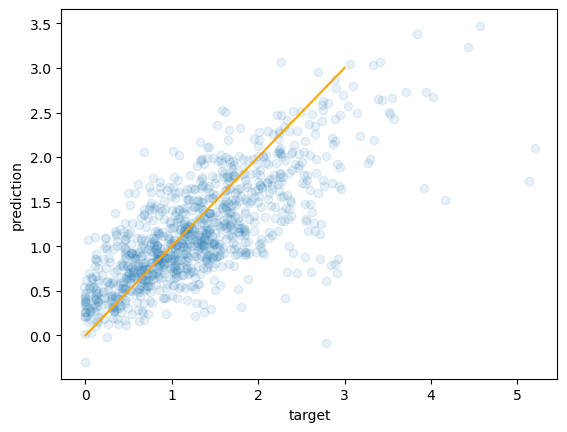

In [8]:
x_lin = np.linspace(0, 3, 100)
plt.plot(x_lin, x_lin, color='orange')

random_sample = val_df.sample(1000)

plt.scatter(
    random_sample.target,
    random_sample.prediction,
    alpha=0.1
)
plt.xlabel('target')
plt.ylabel('prediction')

Text(0, 0.5, 'squared error')

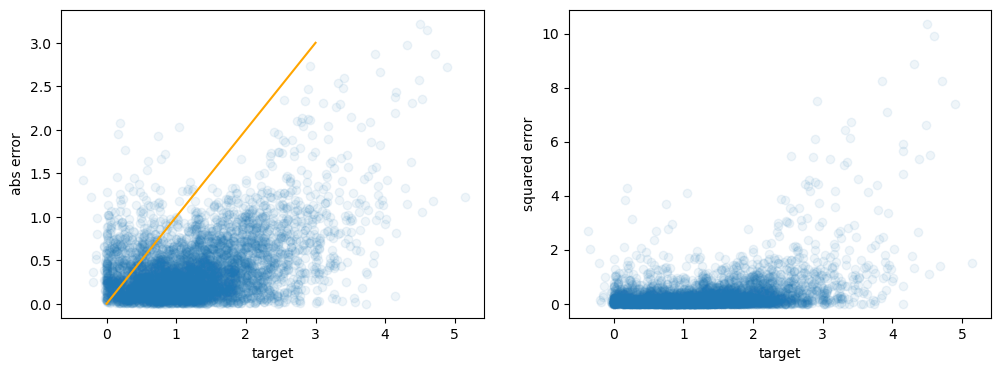

In [9]:
random_sample = val_df.sample(5_000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample['target'],
    np.abs(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('abs error')
x_lin = np.linspace(0, 3, 100)
plt.plot(x_lin, x_lin, color='orange')


plt.subplot(1, 2, 2)
plt.scatter(
    random_sample['target'],
    np.square(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('squared error')

In [9]:
def compute_best_5(df):
    top = df.sort_values('prediction').iloc[:5]
    top = top['config_index'].values.tolist()
    top = [str(i) for i in top]
    return ';'.join(top)

val_prediction = val_df.groupby('ID').apply(compute_best_5)
val_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
val_prediction

ID
tile:xla:bert_pretraining.4x4.fp16_-18321ad156c55c0b           422;83;846;844;80
tile:xla:bert_pretraining.4x4.fp16_-1972c148bcabec74          187;138;284;188;92
tile:xla:bert_pretraining.4x4.fp16_-1a91e1daf560d9c7             11;32;66;15;117
tile:xla:bert_pretraining.4x4.fp16_-1c6db741e059e66c                5;0;19;27;15
tile:xla:bert_pretraining.4x4.fp16_-2687e894772f7802      977;1301;1139;1137;486
                                                                  ...           
tile:xla:unet_3d.4x4.bf16_-563d7c5458dedfa9                  537;529;999;641;157
tile:xla:unet_3d.4x4.bf16_-66d55ea6ab9f0635                  434;111;400;379;234
tile:xla:unet_3d.4x4.bf16_128e1e63e17596dc              4986;7797;1132;8827;2994
tile:xla:unet_3d.4x4.bf16_2c26a09dea860431               982;5676;1673;1741;2389
tile:xla:unet_3d.4x4.bf16_ffc12c104f9925                     975;119;969;115;673
Length: 676, dtype: object

In [10]:
def tile_score(candidate_configs, tile_dict):
    config_scores = tile_dict['config_runtime'] / tile_dict['config_runtime_normalizers']
    best_runtime = np.min(config_scores)
    best_candidate_runtime = np.min(config_scores[candidate_configs])
    score = 2 - best_candidate_runtime / best_runtime
    return score

In [11]:
tile_valid_dir = 'predict-ai-model-runtime/npz_all/npz/tile/xla/valid'

scores = []
tile_ids = []
for filename in os.listdir(tile_valid_dir):
    tile_id = 'tile:xla:' + filename.rstrip('.npz')
    tile_dict = dict(np.load(os.path.join(tile_valid_dir, filename)))
    n_configurations = len(tile_dict['config_runtime'])
    candidate_configs = val_prediction[tile_id]
    candidate_configs = [int(i) for i in candidate_configs.split(';')]
    score = tile_score(candidate_configs, tile_dict)
    scores.append(score)
    tile_ids.append(tile_id)

evaluation_result = pd.DataFrame(
    data=np.stack([tile_ids, scores], axis=-1),
    columns=['ID', 'score']
)
evaluation_result

,ID,score
0,tile:xla:inception_v3_batch_128_train_e00c619c...,1.0
1,tile:xla:inception_v3_batch_128_train_73909141...,0.9718778774926815
2,tile:xla:inception_v3_batch_128_train_3124d99c...,1.0
3,tile:xla:resnet50.4x4.fp16_-a5d83df59b53f1,0.9880702338007046
4,tile:xla:inception_v3_batch_128_train_5608c687...,1.0
...,...,...
671,tile:xla:tf2_bert_pretrain_dynamic_batch_size_...,0.9962154053448051
672,tile:xla:resnet50.4x4.fp16_-2ac52ba912153e4c,0.9974369887259182
673,tile:xla:resnet_v1_50_official_batch_128_bf16_...,0.996981267926488
674,tile:xla:inception_v3_batch_128_train_31b34c3a...,1.0


In [12]:
evaluation_result['score'].astype(float).mean()

0.8832733923222654

## Inference over test set

In [13]:
test_df = mlp.predict_over_dataset(dataset.test_data, return_labels=False)
test_df

,ID,config_index,prediction
0,b'tile:xla:6ee4b1e0585d266efb2dde1fac8cdfb4',0,0.328317
1,b'tile:xla:6ee4b1e0585d266efb2dde1fac8cdfb4',1,0.186390
2,b'tile:xla:6ee4b1e0585d266efb2dde1fac8cdfb4',2,0.105672
3,b'tile:xla:6ee4b1e0585d266efb2dde1fac8cdfb4',3,0.478718
4,b'tile:xla:6ee4b1e0585d266efb2dde1fac8cdfb4',4,0.705407
...,...,...,...
1420531,b'tile:xla:75121ad778d92722504f620c4c108f45',1060,0.283411
1420532,b'tile:xla:75121ad778d92722504f620c4c108f45',1061,0.132619
1420533,b'tile:xla:75121ad778d92722504f620c4c108f45',1062,0.301498
1420534,b'tile:xla:75121ad778d92722504f620c4c108f45',1063,0.173162


In [14]:
test_prediction = test_df.groupby('ID').apply(compute_best_5)
test_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
test_prediction

ID
tile:xla:0023795810403f8b0b244d88c901322f    2536;464;3024;1850;2494
tile:xla:005c91ca7a50fffc663678fd44316f04         567;580;51;441;127
tile:xla:0070642211d5a98a16b94f4d7df229fe        626;773;970;299;518
tile:xla:008191e0c67a6e7a62cde1a3e1d66795       399;1344;723;478;782
tile:xla:008730b43f100be7c2800d7cb89578a4       1063;282;965;717;382
                                                      ...           
tile:xla:fe52756188d770ee661f69dcd2688142     7684;259;8537;729;2543
tile:xla:fe91ecfc5176e4dea4cec619beb19aeb         71;232;212;235;148
tile:xla:ff9a30ba54b97a48b9f5370a9b1e8cb6           5;106;15;134;119
tile:xla:ffa452493cbec7e4d2fee040879f98ae      675;1170;1141;113;523
tile:xla:ffbfd532de0a28c79f4740753fd78006          118;63;71;141;140
Length: 844, dtype: object

In [17]:
pd.DataFrame(test_prediction, columns=['TopConfigs']).to_csv('tile_test_prediction.csv')

(array([806., 226., 188., 165., 140., 120., 123.,  90.,  71.,  69.,  60.,
         57.,  44.,  25.,  36.,  21.,  23.,  21.,  14.,   9.,  16.,  10.,
          6.,   9.,   6.,   7.,   7.,   7.,   2.,   4.,   2.,   0.,   0.,
          4.,   0.,   0.,   2.,   4.,   2.,   1.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.03106004e-08, 4.50967029e-02, 9.01933983e-02, 1.35290086e-01,
        1.80386782e-01, 2.25483477e-01, 2.70580173e-01, 3.15676868e-01,
        3.60773563e-01, 4.05870259e-01, 4.50966924e-01, 4.96063620e-01,
        5.41160345e-01, 5.86257041e-01, 6.31353736e-01, 6.76450431e-01,
        7.21547067e-01, 7.66643763e-01, 8.11740458e-01, 8.56837153e-01,
        9.01933849e-01, 9.47030544e-01, 9.92127240e-01, 1.03722394e+00,
        1.08232069e+00, 1.12741733e+00, 1.17251408e+00, 1.21761072e+00,
        1.26270735e+00, 1.30780411e+00, 1.35290074e+00, 1.39799750e+00,
        1.44309413e+00, 1.48819089e+00, 1.53328753e+00, 1.57838428e+00,
        1.

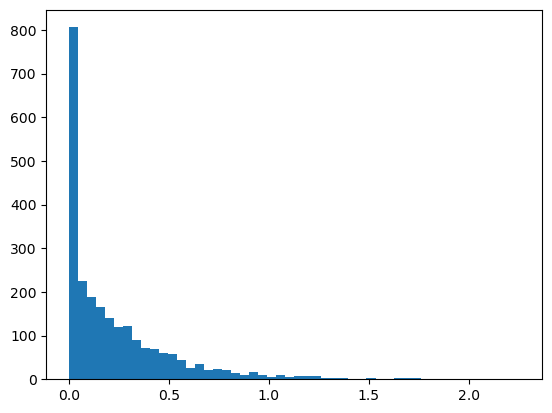

In [33]:
plt.hist(np.abs(mlp.dense_layer_1.kernel.numpy().flatten()), bins=50)